In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow
from tensorflow.keras.optimizers import Adam
from PIL import Image
import IPython.display as display
import os
import pathlib
from sklearn.model_selection import train_test_split

In [ ]:
!unzip 'DataTraining.zip'

Archive:  DataTraining.zip
   creating: DataTraining/1/
  inflating: DataTraining/1/1 (1).jpg  
  inflating: DataTraining/1/1 (10).jpg  
  inflating: DataTraining/1/1 (11).jpg  
  inflating: DataTraining/1/1 (12).jpg  
  inflating: DataTraining/1/1 (13).jpg  
  inflating: DataTraining/1/1 (14).jpg  
  inflating: DataTraining/1/1 (15).jpg  
  inflating: DataTraining/1/1 (16).jpg  
  inflating: DataTraining/1/1 (17).jpg  
  inflating: DataTraining/1/1 (18).jpg  
  inflating: DataTraining/1/1 (19).jpg  
  inflating: DataTraining/1/1 (2).jpg  
  inflating: DataTraining/1/1 (20).jpg  
  inflating: DataTraining/1/1 (21).jpg  
  inflating: DataTraining/1/1 (22).jpg  
  inflating: DataTraining/1/1 (23).jpg  
  inflating: DataTraining/1/1 (24).jpg  
  inflating: DataTraining/1/1 (25).jpg  
  inflating: DataTraining/1/1 (26).jpg  
  inflating: DataTraining/1/1 (27).jpg  
  inflating: DataTraining/1/1 (28).jpg  
  inflating: DataTraining/1/1 (29).jpg  
  inflating: DataTraining/1/1 (3).jpg  
  in

In [ ]:
data_dir = '/content/DataTraining'

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.4, 
    rescale=1./255
)

image_width, image_height = 224,224

train_generator = datagen.flow_from_directory(
    data_dir, 
    subset='training',
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb",
    target_size=(image_width, image_height),
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    subset='validation',
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb",
    target_size=(image_width, image_height),
    shuffle=True
)

Found 90 images belonging to 5 classes.
Found 60 images belonging to 5 classes.


In [ ]:
data_augmentation = tf.keras.models.Sequential(
  [
      tf.keras.layers.RandomFlip(
          "horizontal",
          input_shape=(train_generator.image_shape)
      ),
#       tf.keras.layers.RandomZoom(
#           height_factor = (0.2, 0.4),
#           width_factor = (0.2, 0.4),
#       ),
#       tf.keras.layers.RandomRotation(0.3)
  ]
)

In [ ]:
model = tf.keras.models.Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 186624)           

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(
    train_generator, 
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    validation_data = val_generator,
    validation_steps = val_generator.samples // val_generator.batch_size,
    epochs = 10,
)

Epoch 1/10
2/2 [==============================] - 6s 3s/step - loss: 4.1166 - accuracy: 0.1094 - val_loss: 5.4397 - val_accuracy: 0.3438
Epoch 2/10
2/2 [==============================] - 4s 2s/step - loss: 5.1053 - accuracy: 0.2241 - val_loss: 2.8424 - val_accuracy: 0.4375
Epoch 3/10
2/2 [==============================] - 4s 2s/step - loss: 3.0201 - accuracy: 0.4483 - val_loss: 1.4224 - val_accuracy: 0.5312
Epoch 4/10
2/2 [==============================] - 5s 3s/step - loss: 1.2254 - accuracy: 0.4828 - val_loss: 0.7301 - val_accuracy: 0.8438
Epoch 5/10
2/2 [==============================] - 5s 3s/step - loss: 0.5283 - accuracy: 0.9310 - val_loss: 0.4266 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 5s 3s/step - loss: 0.3543 - accuracy: 0.9310 - val_loss: 0.3628 - val_accuracy: 0.9062
Epoch 7/10
2/2 [==============================] - 5s 3s/step - loss: 0.2628 - accuracy: 0.8906 - val_loss: 0.2456 - val_accuracy: 1.0000
Epoch 8/10
2/2 [=========================

In [ ]:
history=model.history.history
print(history)

{'loss': [4.116582870483398, 5.1053147315979, 3.020073175430298, 1.2254297733306885, 0.5282658934593201, 0.3543313145637512, 0.2627752125263214, 0.14537513256072998, 0.13024713099002838, 0.07293325662612915], 'accuracy': [0.109375, 0.22413793206214905, 0.4482758641242981, 0.48275861144065857, 0.931034505367279, 0.931034505367279, 0.890625, 0.982758641242981, 0.9655172228813171, 0.984375], 'val_loss': [5.439733982086182, 2.8423678874969482, 1.4224061965942383, 0.7300621271133423, 0.42659991979599, 0.36283019185066223, 0.24560587108135223, 0.10324962437152863, 0.1761653870344162, 0.19313526153564453], 'val_accuracy': [0.34375, 0.4375, 0.53125, 0.84375, 1.0, 0.90625, 1.0, 1.0, 1.0, 0.9375]}


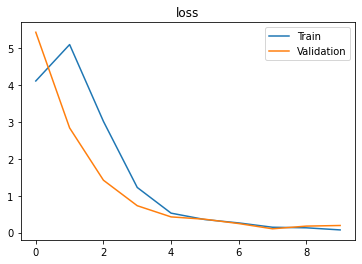

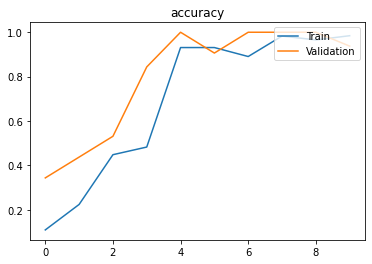

In [ ]:
def plotting():
    plot1=plt.figure(1)
    plt.title('loss')
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.legend(['Train','Validation'],loc='upper right')
    plt.show()

    plot2=plt.figure(2)
    plt.title('accuracy')
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.legend(['Train','Validation'],loc='upper right')
    plt.show()
  
plotting()